In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [2]:
df = pd.read_csv("/content/Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df['IncomeRisk'] = ['Risky' if income <= 30000 else 'Good' for income in df['Taxable.Income']]

In [5]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   IncomeRisk       600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include='object'):
    df[column] = le.fit_transform(df[column])

df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [10]:
df['IncomeRisk'].value_counts()

0    476
1    124
Name: IncomeRisk, dtype: int64

In [11]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


<ipython-input-15-e29c76dcd18d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Taxable.Income"], kde=False, bins=10)


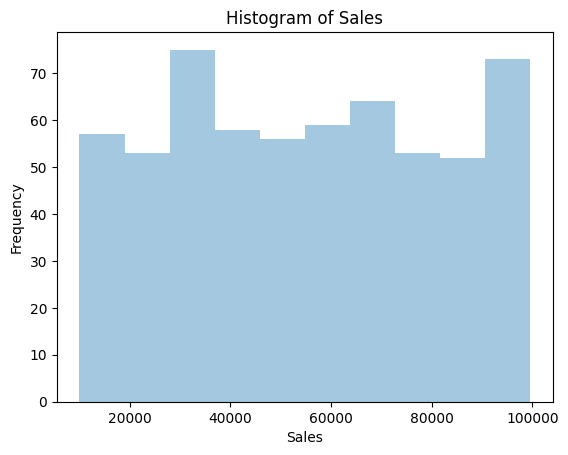

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the "Sales" column
sns.distplot(df["Taxable.Income"], kde=False, bins=10)

# Add labels and title
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Sales")

# Show the plot
plt.show()

In [18]:
x = df.iloc[:, :-1]
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [20]:
y = df.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: IncomeRisk, Length: 600, dtype: int64

In [21]:
print(x.head())
print(y.head())

   Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban  
0               10      1  
1               18      1  
2               30      1  
3               15      1  
4               28      0  
0    0
1    0
2    0
3    0
4    0
Name: IncomeRisk, dtype: int64


In [22]:
seed = 5
kfold = KFold(n_splits=5,random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 50

In [23]:
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed)

In [24]:
model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=5)

In [25]:
results = cross_val_score(model, x,y, cv=kfold)

In [27]:
results

array([1.        , 1.        , 1.        , 0.99166667, 1.        ])

In [28]:
print(results.mean())

0.9983333333333334


In [29]:
## bagging / random forest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [30]:
num_tress = 100
max_features = 3
kfold = KFold(n_splits=10)

In [31]:
model = RandomForestClassifier(n_estimators=num_tress, max_features=max_features)

In [32]:
model

RandomForestClassifier(max_features=3)

In [33]:
results = cross_val_score(model, x,y, cv=kfold)

In [34]:
results

array([1.        , 1.        , 1.        , 1.        , 0.98333333,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [35]:
print(results.mean())

0.9983333333333334


In [36]:
## Adaboost
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [37]:
num_tress = 10
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

In [38]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

In [39]:
model

AdaBoostClassifier(random_state=7)

In [40]:
results = cross_val_score(model, x,y, cv=kfold)

In [41]:
results

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98333333, 1.        , 1.        , 1.        , 1.        ])

In [42]:
print(results.mean())

0.9983333333333334


In [43]:
## stacking ensemble for classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [44]:
kfold = KFold(n_splits=10)

In [45]:
estimators = [ ]

model1 = LogisticRegression(max_iter=500)
estimators.append(('Logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svc', model3))

## create ensemble method
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)

In [46]:
estimators

[('Logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svc', SVC())]

In [47]:
results

array([1.        , 0.98333333, 0.96666667, 0.93333333, 1.        ,
       1.        , 0.98333333, 0.98333333, 1.        , 1.        ])

In [48]:
print(results.mean())

0.985
